# Datenauswertung
### Thema: Der Effekt der Anime-Konvertierung auf das Bild nach dem Hinzufügen von weißem Rauschen
### Daten von experten und naiven Versuchspersonen
### Seminar Visuelle Wahrnehmung beim Menschen und Bildqualität

In [1]:
import pandas as pd   # module to work with data in DataFrames.
import seaborn as sns  # module to plot DataFrames in an easy way
import matplotlib.pyplot as plt

In [2]:
# we read the data
dfSun = pd.read_csv('design_rating_single_resultsSun.csv')
dfSun['observer'] = 'Person1'
dfAn = pd.read_csv('design_rating_single_resultsAn.csv')
dfAn['observer'] = 'Person2'
dfYou = pd.read_csv('design_rating_single_resultsYou.csv')
dfYou['observer'] = 'Person3'
dfJian = pd.read_csv('design_rating_single_resultsJian.csv')
dfJian['observer'] = 'Person4'
dfMing = pd.read_csv('design_rating_single_resultsMing.csv')
dfMing['observer'] = 'Person5'
dfLan = pd.read_csv('design_rating_single_resultsLan.csv')
dfLan['observer'] = 'Person6'
data = pd.concat((dfSun, dfAn))
data = pd.concat((data,dfYou))
data = pd.concat((data,dfJian))
data = pd.concat((data,dfMing))
data = pd.concat((data,dfLan))

data = data.dropna(axis=0,how='any') #data without NAN
# len(dfSun)
len(data)

2160

In [3]:
# explore the first entries in your data
data

,test_image,response,resptime,observer
0,ani25g1p9.png,4.0,6.819346,Person1
1,anig2p2.png,10.0,1.991363,Person1
2,ani35g1p1.png,3.0,2.183507,Person1
3,ani45g3p3.png,1.0,1.415509,Person1
4,ani35g3p1.png,1.0,0.777926,Person1
...,...,...,...,...
355,ani15g2p7.png,7.0,1.483549,Person6
356,anig3p9.png,9.0,1.284830,Person6
357,ori15g2p3.png,7.0,1.156271,Person6
358,ori35g1p9.png,3.0,1.377995,Person6


In [4]:
len(data['test_image'].unique())   #360 bilder 

360

In [5]:
# hinzufuegen col group(1,2,3)
g1data = data.loc[data['test_image'].str.contains("g1")] #alle Bilde aus g1
g2data = data.loc[data['test_image'].str.contains("g2")] #alle Bilde aus g2
g3data = data.loc[data['test_image'].str.contains("g3")] #alle Bilde aus g3

g1data.loc[:,'group'] = 'hoch Detailgrad'
g2data.loc[:,'group'] = 'mittel Detailgrad'
g3data.loc[:,'group'] = 'wenig Detailgrad'
data = pd.concat((g1data, g2data))
data = pd.concat((data,g3data))

# hinzufuegen col typ(Anime, Original)
anidata = data.loc[data['test_image'].str.contains("ani")] #alle Bilde aus anime
oridata = data.loc[data['test_image'].str.contains("ori")] 
anidata.loc[:,'type'] = 'Anime'
oridata.loc[:,'type'] = 'Original'
data = pd.concat((anidata,oridata))

# hinzufuegen col noise(5,15,25,35,45)
data5 = data.loc[data['test_image'].str.contains("ani5|ori5")]
data15 = data.loc[data['test_image'].str.contains("15")] 
data25 = data.loc[data['test_image'].str.contains("25")] 
data35 = data.loc[data['test_image'].str.contains("35")] 
data45 = data.loc[data['test_image'].str.contains("45")] 

data0 = data[~ data['test_image'].str.contains('ani5|ani15|ani25|ani35|ani45|ori5|ori15|ori25|ori35|ori45')]

data0.loc[:,'noise'] = '0'
data5.loc[:,'noise'] = '5'
data15.loc[:,'noise'] = '15'
data25.loc[:,'noise'] = '25'
data35.loc[:,'noise'] = '35'
data45.loc[:,'noise'] = '45'

newdata = pd.concat((data0,data5))
newdata = pd.concat((newdata,data15))
newdata = pd.concat((newdata,data25))
newdata = pd.concat((newdata,data35))
newdata = pd.concat((newdata,data45))

newdata.to_csv('newdata.csv')
newdata = pd.read_csv('newdata.csv')
#wie speiche ich die neue csv file??
newdata

C:\Users\annay\anaconda3\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\annay\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,Unnamed: 0,test_image,response,resptime,observer,group,type,noise
0,7,anig1p3.png,10.0,0.767672,Person1,hoch Detailgrad,Anime,0
1,78,anig1p2.png,10.0,1.115827,Person1,hoch Detailgrad,Anime,0
2,143,anig1p7.png,8.0,4.748432,Person1,hoch Detailgrad,Anime,0
3,239,anig1p8.png,7.0,2.713915,Person1,hoch Detailgrad,Anime,0
4,251,anig1p5.png,10.0,1.480360,Person1,hoch Detailgrad,Anime,0
...,...,...,...,...,...,...,...,...
2155,155,ori45g3p5.png,3.0,1.041213,Person6,wenig Detailgrad,Original,45
2156,156,ori45g3p10.png,1.0,0.989351,Person6,wenig Detailgrad,Original,45
2157,299,ori45g3p3.png,1.0,0.863625,Person6,wenig Detailgrad,Original,45
2158,304,ori45g3p4.png,3.0,1.287472,Person6,wenig Detailgrad,Original,45


## Visualizing data


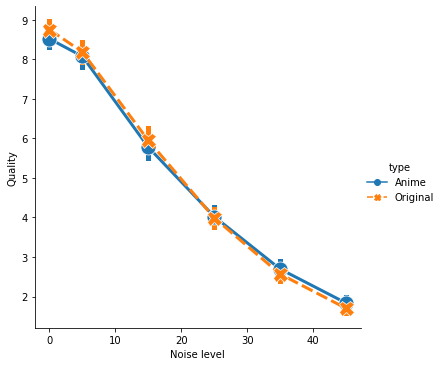

In [11]:
#totally no difference between Anime and Original
g = sns.relplot(x='noise', y='response', data=newdata, 
                hue='type',kind='line', ci = 95, err_style='bars', markers=True, 
                style='type', linewidth = 3, markersize=15, err_kws={'elinewidth':5})
g.set_ylabels('Quality')
g.set_xlabels('Noise level')
g.savefig()

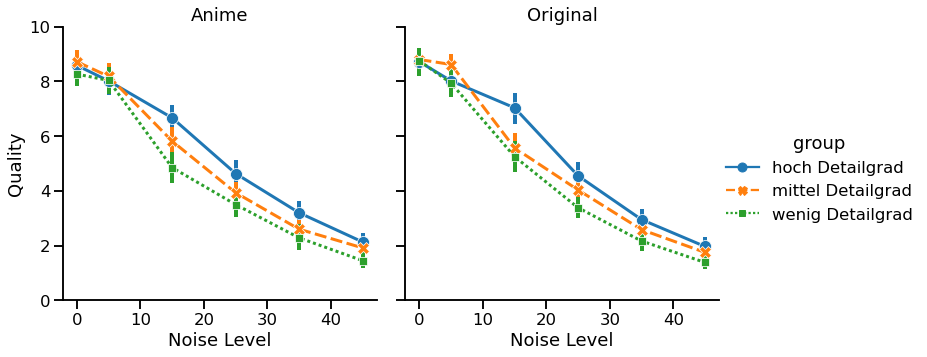

In [37]:
g = sns.relplot(x='noise', y='response', data=newdata, hue='group',
                col='type',kind='line',ci=95,markers=True,  err_style='bars',
                style='group', linewidth = 3, markersize=12, err_kws={'elinewidth':4})
g.set_ylabels('Quality')
g.set_xlabels('Noise Level')
g.set_titles('{col_name}')
g.set(ylim = (0, 10))

## Statistical analysis

In [12]:
# we load scipy
import scipy

### ANOVA
If we want to compare the means of more than 2 groups, we need to perform an Analysis of Variance (ANOVA). The null-hypothesis in the ANOVA states that there is no difference between the means of the groups. A p-value less than 0.05 (at 95 %) rejects this general hypothesis without indicating which groups are different from one another.

In [13]:
  # for an ANOVA we need the python module statsmodels (statistical models)
import statsmodels.api as sm  

# the particular function we need is called ols()
# (ols: ordinary least squares, that is the type of fitting)
from statsmodels.formula.api import ols   

In [14]:
# we need to set up a 'formula' for the model. This formula is similar to the syntax in R.

# on the left side of the tilde we put the dependent variable
# on the right side of the tilde we state the independent variables 
# the C( )  indicates that we consider the variable as a categorical variable (and not continuous)
# the sign + is not a sum, it is to indicate more than one variable.
# the sign * is not a multiplication, it is to indicate we want to also model interactions between the variables

# we call ols() passing the model 'formula'
mod = ols('response ~ C(group) * C(noise) * C(type)',data=newdata)

# we fit the model
fit = mod.fit()

# we show the ANOVA table
sm.stats.anova_lm(fit)

,df,sum_sq,mean_sq,F,PR(>F)
C(group),2.0,213.812037,106.906019,47.153320,9.187031e-21
C(noise),5.0,14646.003704,2929.200741,1291.990304,0.000000e+00
C(type),1.0,0.740741,0.740741,0.326720,5.676571e-01
C(group):C(noise),10.0,150.493519,15.049352,6.637857,3.273033e-10
C(group):C(type),2.0,0.595370,0.297685,0.131301,8.769611e-01
C(noise):C(type),5.0,11.109259,2.221852,0.979998,4.284796e-01
C(group):C(noise):C(type),10.0,16.954630,1.695463,0.747822,6.795683e-01
Residual,2124.0,4815.533333,2.267200,NaN,NaN


The ANOVA table shows that for both variables k and g there is a signifficant effect (p-values < 0.05 for 95 % confidence). There is also a signifficant interaction term ('C(k):C(g)').
